In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv('/home/sreenal/AI/Assignments/Big_mart_Sales_Prediction/train.csv')

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.shape

(8523, 12)

In [11]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [16]:
df['Item_Weight'].nunique()

415

In [17]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [18]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [20]:
df['Outlet_Size'].fillna('Others',inplace=True)

In [21]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
numericalColumns = df.select_dtypes(include=np.number).columns
objectColumns = df.select_dtypes(include=np.object).columns

In [23]:
numericalColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

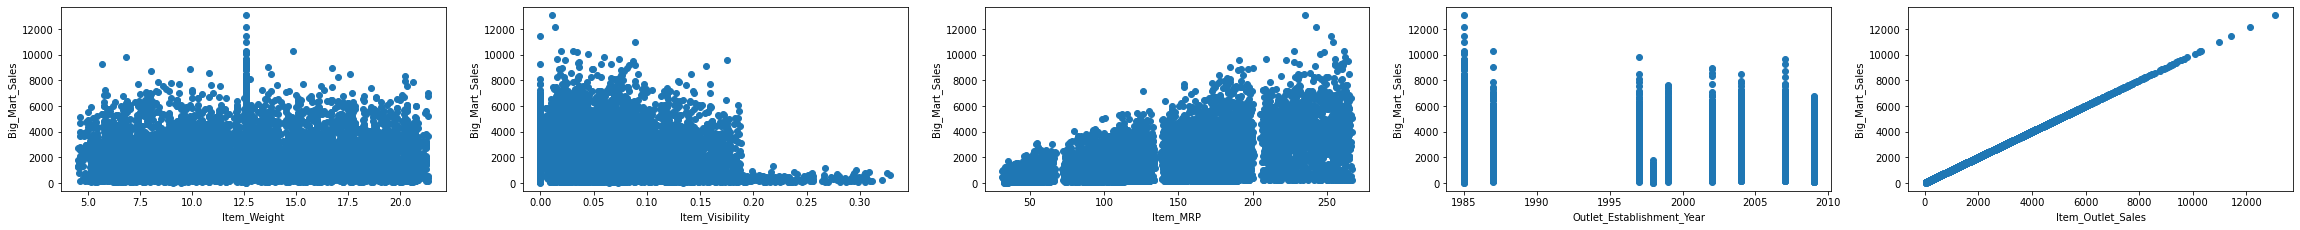

In [24]:
j=0
plt.figure(figsize=(40,40))
for column in numericalColumns:
    plt.subplot(10,5,j+1)
    plt.scatter(df[column],df['Item_Outlet_Sales'])
    plt.xlabel(column)
    plt.ylabel("Big_Mart_Sales")
    j+=1

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc705f5cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc705f5d1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc705f5c940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc705f5d750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc705f5da20>],
 'means': []}

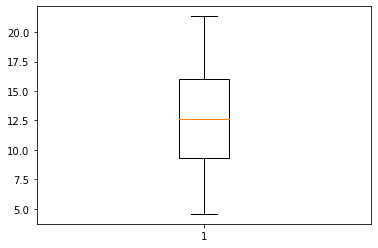

In [25]:
plt.boxplot(df['Item_Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc705faf0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc705faf670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc705faedd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc705fafc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc705faff10>],
 'means': []}

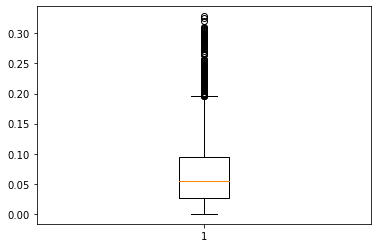

In [26]:
plt.boxplot(df['Item_Visibility'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7060294e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc706029a80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc706029210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc70602a020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc70602a2f0>],
 'means': []}

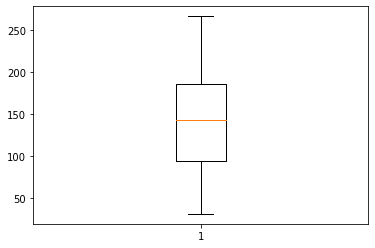

In [27]:
plt.boxplot(df['Item_MRP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc70812add0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc70812b370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc70812ab00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc70812b910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc70812bbe0>],
 'means': []}

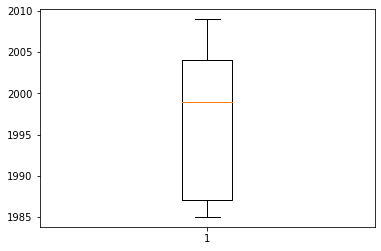

In [28]:
plt.boxplot(df['Outlet_Establishment_Year'])

In [29]:
descriateCols=[]
continuesCols=[]



for column in numericalColumns:
    if df[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [30]:
continuesCols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

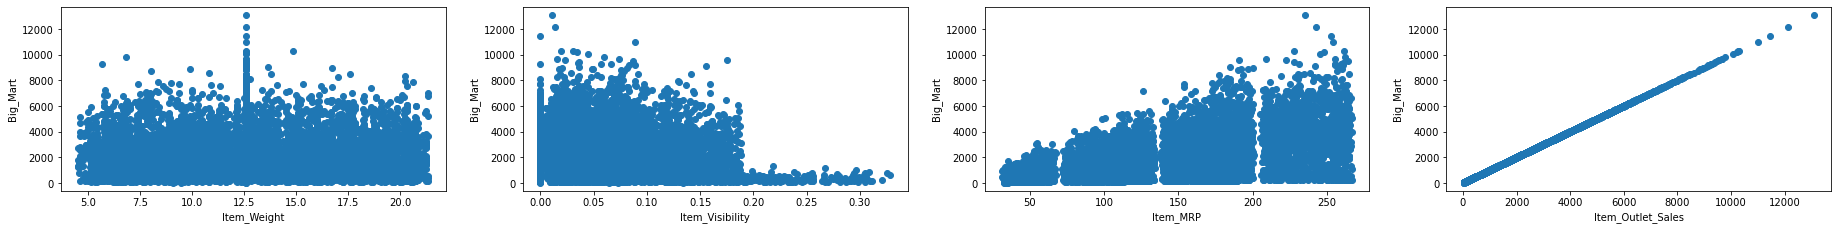

In [31]:
j=0
plt.figure(figsize=(40,40))
for column in continuesCols:
    plt.subplot(10,5,j+1)
    plt.scatter(df[column],df['Item_Outlet_Sales'])
    plt.xlabel(column)
    plt.ylabel("Big_Mart")
    j+=1

In [32]:
upper_lim=df['Item_Visibility'].mean()+df['Item_Visibility'].std() *3
lower_lim=df['Item_Visibility'].mean()-df['Item_Visibility'].std() *3

df.loc[(df['Item_Visibility'] >upper_lim),'Item_Visibility'] = upper_lim
df.loc[(df['Item_Visibility'] < lower_lim),'Item_Visibility'] = lower_lim

In [33]:
df[(df['Item_Visibility'] <= upper_lim) & (df['Item_Visibility'] >= lower_lim) ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Others,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Others,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


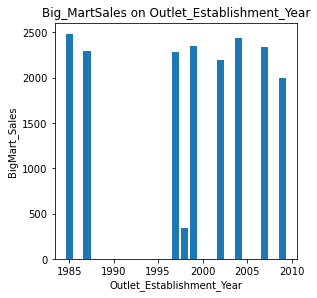

In [34]:
j=0
plt.figure(figsize=(20,20))
for column in descriateCols:
    plt.subplot(4,4,j+1)
    observationVal = df.groupby(column)['Item_Outlet_Sales'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'Item_Outlet_Sales',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['Item_Outlet_Sales'])
    plt.title(f"Big_MartSales on {column}")
    plt.xlabel(column)
    plt.ylabel("BigMart_Sales")
    j+=1

In [35]:
descriateCols

['Outlet_Establishment_Year']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
objectColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

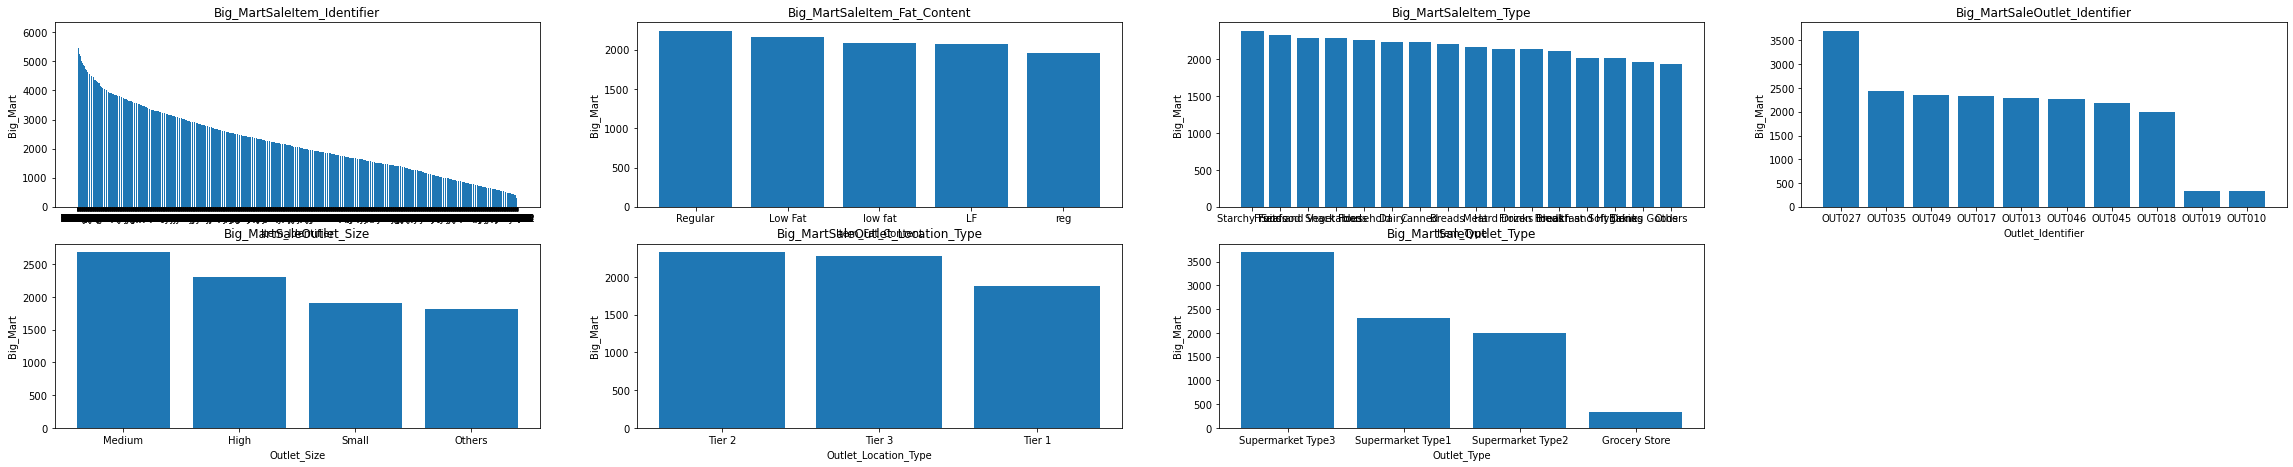

In [38]:
j=0
plt.figure(figsize=(40,40))
for column in objectColumns:
    plt.subplot(10,4,j+1)
    observationVal = df.groupby(column)['Item_Outlet_Sales'].mean()
    observationValDF=pd.DataFrame(observationVal).sort_values(by = 'Item_Outlet_Sales',ascending=False)
    observationValDF.reset_index(inplace =True)
    plt.bar(observationValDF[column],observationValDF['Item_Outlet_Sales'])
    plt.title(f"Big_MartSale{column}")
    plt.xlabel(column)
    plt.ylabel("Big_Mart")
    j+=1

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [40]:
objectColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [41]:
labelencoder=LabelEncoder()

In [42]:
objectColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [43]:
df['Item_Identifier']=labelencoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']=labelencoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=labelencoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=labelencoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=labelencoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=labelencoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=labelencoder.fit_transform(df['Outlet_Type'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [46]:
corrDF=df.corr()
corrColumns = abs(corrDF['Item_Outlet_Sales']).sort_values(ascending=False)

In [47]:
corrColumns


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Size                  0.157386
Item_Visibility              0.123068
Outlet_Location_Type         0.089367
Outlet_Establishment_Year    0.049135
Item_Type                    0.017048
Item_Fat_Content             0.009800
Item_Weight                  0.009693
Item_Identifier              0.002869
Name: Item_Outlet_Sales, dtype: float64

In [48]:
final_df = corrColumns[corrColumns>0.1].index

In [49]:
final_df

Index(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Item_Visibility'],
      dtype='object')

In [50]:
final_df.shape

(6,)

In [51]:
df_=df[['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Item_Visibility']]

In [52]:
df_.shape

(8523, 6)

In [53]:
X=df_.drop('Item_Outlet_Sales',axis=1)

In [54]:
y=df_['Item_Outlet_Sales']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns)

# sc_y= StandardScaler()
# y_train=pd.DataFrame(sc_y.fit_transform(np.array(y_train).reshape(-1, 1)))
# y_test=pd.DataFrame(sc_y.transform(np.array([y_test]).reshape(-1, 1)))

In [57]:
X_test

,Item_MRP,Outlet_Type,Outlet_Identifier,Outlet_Size,Item_Visibility
0,-0.996572,-0.263258,-1.311545,-1.755051,-0.788362
1,-1.582307,-0.263258,1.164599,1.282332,0.121320
2,-1.592886,-0.263258,1.518334,-0.742590,-0.483754
3,0.507182,2.237916,0.103395,-0.742590,-0.413679
4,0.886898,-0.263258,0.457129,1.282332,-1.069244
...,...,...,...,...,...
2808,-1.289692,-0.263258,-1.311545,-1.755051,0.126539
2809,0.436074,-0.263258,-0.957810,0.269871,-0.787749
2810,0.613423,-0.263258,-0.957810,0.269871,-0.498485
2811,0.912377,-0.263258,1.164599,1.282332,-0.389575


In [58]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
2418    1592.5936
5412    3705.8428
6463    1258.3620
3805    2182.4924
1580     319.5840
Name: Item_Outlet_Sales, Length: 2813, dtype: float64

Decision Tree

from sklearn.tree import DecisionTreeRegressor 

In [59]:
from sklearn.tree import DecisionTreeRegressor 

In [60]:
from sklearn.metrics import mean_squared_error 

In [61]:
dt_Reg = DecisionTreeRegressor(max_depth=7)
dt_Reg.fit(X_train,y_train)

score = dt_Reg.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_Reg.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_Reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))



R-squared Train  : 0.6277801353770562
R-squared Test  : 0.5674919808178307
MSE : 1212201.5673138734
RMSE : 1101.000257635698
